<a href="https://colab.research.google.com/github/ayush9304/Hotel-Booking-Analysis-EDA/blob/main/Hotel_Booking_Analysis_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ayush9304/Hotel-Booking-Analysis-EDA/main/hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
print(df.shape)
df.columns

(119390, 32)


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
print("Active Reservation status values: ",df[df['is_canceled']==0]['reservation_status'].unique())
print("Cancelled Resrv. status values:",df[df['is_canceled']==1]['reservation_status'].unique())

Active Reservation status values:  ['Check-Out']
Cancelled Resrv. status values: ['Canceled' 'No-Show']


### Bookings by different types of hotels

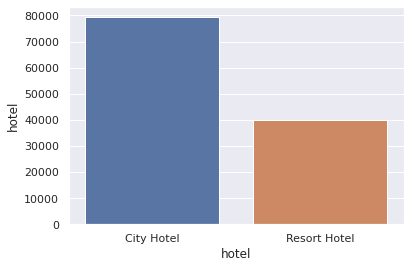

In [6]:
d = df.groupby('hotel')['hotel'].count()
sns.barplot(x=d.index, y=d)

More bookings are made in City Hotels than Resort Hotel

### Counts of Cancelled vs Not-Cancelled Bookings in different types of hotels

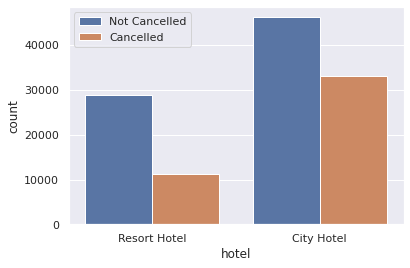

In [7]:
sns.countplot(x='hotel', hue='is_canceled', data=df)
plt.legend(['Not Cancelled', 'Cancelled'])

### Booking by year & type of hotel

In [8]:
df['arrival_date_year'].unique()

array([2015, 2016, 2017])

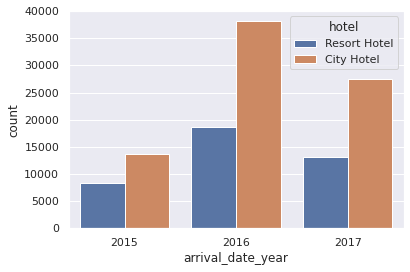

In [9]:
sns.countplot(x='arrival_date_year', hue='hotel', data=df)

### No. of bookings by months of year

In [10]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

Text(0.5, 1.0, 'Bookings by months')

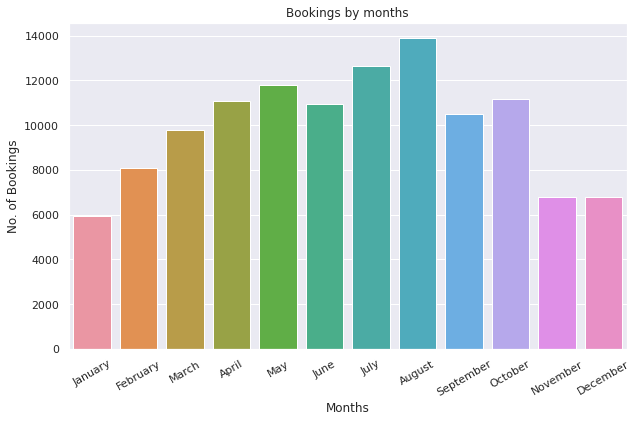

In [11]:
d = df.groupby("arrival_date_month")["arrival_date_month"].count()
plt.figure(figsize=(10,6))
sns.barplot(x=d.index, y=d, order=months)
p = plt.xticks(rotation=30)
plt.xlabel("Months")
plt.ylabel("No. of Bookings")
plt.title("Bookings by months")

November, December, January, February are the month having least bookings. Mid-year months have more bookings

In [12]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [13]:
d = df['country'].value_counts()
d.describe()

count      177.000000
mean       671.762712
std       3931.154035
min          1.000000
25%          2.000000
50%         12.000000
75%         74.000000
max      48590.000000
Name: country, dtype: float64

## Booking Status by country

In [16]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

#### Top 20 countries by number of bookings

In [14]:
# Total distribution of guests by country
# plt.figure(figsize=(10,10))
# p = plt.pie(d, labels=d.index, autopct="%.0f%%")

Text(0.5, 1.0, 'Top 20 countries by number of guests')

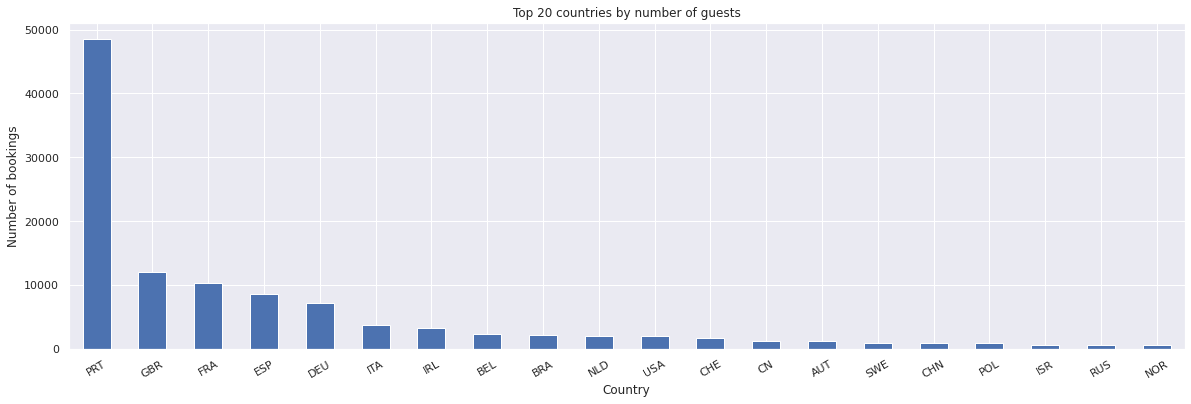

In [15]:
plt.figure(figsize=(20,6))
d.sort_values(ascending=False)[:20].plot(kind='bar')
p = plt.xticks(rotation=30)
plt.xlabel("Country")
plt.ylabel("Number of bookings")
plt.title("Top 20 countries by number of guests")

The country of Portugal (PRT) has significantly higher number of bookings compared to any other countries.

### Booking type by country (Top 15)

Text(0.5, 1.0, 'Booked Hotel type by country')

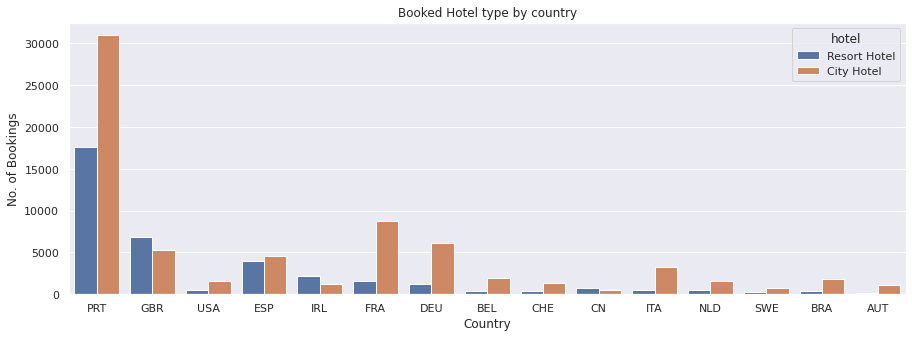

In [17]:
d = df['country'].value_counts().sort_values(ascending=False)[:15]
plt.figure(figsize=(15,5))
sns.countplot(x='country', hue='hotel', data=df[df['country'].isin(d.index)])
plt.xlabel("Country")
plt.ylabel("No. of Bookings")
plt.title("Booked Hotel type by country")

Guests form Portugal (PRT) from where most bookings are made prefers City Hotels over Resort Hotels. Whereas guests from Britain (GBR), country with second highest bookings prefers Resort Hotels more.